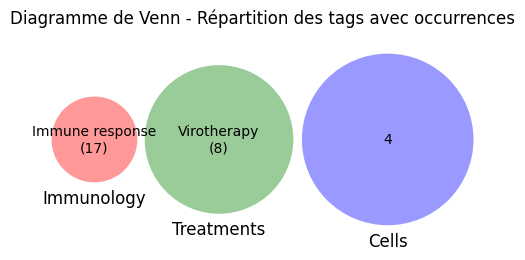

In [9]:
""" Basic statistics and plots : Venn Diagram, etc . . . """
# SDG : Add below imports to common_immunogity.py when safe
import json
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

file_path = "model_metadata_tags.json"
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

tag_counts = defaultdict(int)

for model_info in data.values():
    if "tags" in model_info:
        for tag in model_info["tags"]:
            if ":" in tag:
                _, term = map(str.strip, tag.split(":", 1))
                tag_counts[term.lower()] += 1

venn_sets = {cat: set() for cat in categories}
occurrences = {cat: defaultdict(int) for cat in categories}

for category in categories:
    for term in keywords_dict[category]:
        term_lower = term.lower().strip()
        if term_lower in tag_counts:
            venn_sets[category].add(term)
            occurrences[category][term] = tag_counts[term_lower]

# VENN
plt.figure(figsize=(6, 6))
venn = venn3([venn_sets["Immunology"], venn_sets["Treatments"], venn_sets["Cells"]],
             set_labels=categories)

# Add occurrences
for category, idx in zip(categories, range(3)):
    for term in venn_sets[category]:
        subset = venn.subset_labels[idx]
        if subset:
            label = f'{term}\n({occurrences[category].get(term, 0)})'
            subset.set_text(label)

# Add values
for subset in venn.subset_labels:
    if subset:
        subset.set_fontsize(10)

plt.title("Venn Diagram")
# plt.savefig("venn3_immunology.png", dpi=300)
plt.show()

# Venn diagram is bad, should make use of below code to THEN be ran again. Plus, needs to take account the OTHER cat. 

In [17]:
""" Basic Dataframe for Metrics """
# SDG.
import json
import pandas as pd
from collections import defaultdict

file_path = "model_metadata_tags.json"
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Dict.
keywords_dict = {
    "Cells": [
        "T helper cells", "B cells", "Cytotoxic T cells", "Plasma cells",
        "Tumor cells", "Avascular cancerous cells", "Cancer cells", "CTL",
        "Infected tumor cells", "Uninfected tumor cells", "Effector cells",
        "Immune system cells", "Tumor-specific CTL", "Virus-specific CTL",
        "Immune killer cells", "Tumor-infiltrating lymphocytes"
    ],
    "Treatments": [
        "Immunotherapy", "Monoclonal antibody therapy", "Radiovirotherapy",
        "Virotherapy", "Radiotherapy", "Cancer therapy", "Chemotherapy",
        "Optimal chemotherapy", "Strongly targeted agent", "Cancer immunotherapy",
        "Immune checkpoint inhibitors", "Adoptive cell therapy"
    ],
    "Interactions": [
        "Cancer-immune system interaction", "Immune cell killing", "Tumor remission",
        "Tumor growth", "Virus replication", "Virus infection", "Immune suppression",
        "Immunostimulatory signals", "Bistability", "Antibody-mediated killing",
        "Optimal control", "Tumor immune-system interactions", "Immune response",
        "Immune escape", "Tumor microenvironment", "Cytokine signaling"
    ],
    "Diseases": [
        "Cancer", "Tumor", "Head and neck cancer", "Adenovirus", "ONYX-015",
        "Genetically engineered viruses", "Malignant tumor", "Benign tumor",
        "Metastatic cancer", "Solid tumors", "Hematological malignancies"
    ],
    "Immunology": [
        "Immune response", "Immune system cells", "Virus-specific CTL response",
        "Tumor-specific CTL", "Immune effector cells", "Immune-induced",
        "Monoclonal antibodies", "Immunosuppressive effects", "Immunological barrier",
        "Immune dynamics", "Immune stability", "Innate immunity", "Adaptive immunity"
    ],
    "Biology": [
        "Transcritical bifurcation", "Global stability", "Local stability",
        "Cytotoxic virus", "Non-cytotoxic virus", "Logistic growth",
        "Generalized logistic growth", "Gompertzian model", "Exponential growth",
        "Cellular proliferation", "Apoptosis", "Angiogenesis"
    ],
    "Mathematics": [
        "Ordinary differential equations", "Cancer model", "Virus model",
        "Cancer-immune system interaction model", "Basic CISI model",
        "Radiovirotherapy model", "Optimal control", "Multi-stable dynamics",
        "Equilibria stability", "Stable manifold", "Saddle point", "Asymptotic stability",
        "Bifurcation analysis", "Parameter sensitivity"
    ],
    "Pharmacology": [
        "Phase I", "Phase II", "Clinical trials", "Drug stability",
        "Pharmacokinetics", "Pharmacodynamics", "Dose-response relationship"
    ],
    "Global": [
        "Immuno-oncology", "BioModels", "Reactome", "SBML", "SBGN",
        "Mathematical modeling", "Computational biology", "Numerical analysis",
        "Systems biology", "Bioinformatics", "Data integration"
    ]
}

# for the titles
title_keywords = ["immune system", "immune response", "therapy"]

tag_counts = defaultdict(int)

title_classification = {}

for model_id, model_info in data.items():
    title = model_info.get("title", "").lower()
    title_category = "OTHER"

    for keyword in title_keywords:
        if keyword in title:
            title_category = keyword
            break

    title_classification[model_id] = title_category

    if "tags" in model_info:
        for tag in model_info["tags"]:
            if ":" in tag:
                _, term = map(str.strip, tag.split(":", 1))
                tag_counts[term.lower()] += 1  # Convertir en minuscules pour une comparaison insensible à la casse

count_table = []

for category, terms in keywords_dict.items():
    for term in terms:
        term_lower = term.lower().strip() # lowercase, no spacing !
        count = tag_counts.get(term_lower, 0)
        count_table.append({"Category": category, "Term": term, "Count": count})

# classify per titles
count_table.append({"Category": "Title", "Term": "immune system", "Count": list(title_classification.values()).count("immune system")})
count_table.append({"Category": "Title", "Term": "immune response", "Count": list(title_classification.values()).count("immune response")})
count_table.append({"Category": "Title", "Term": "therapy", "Count": list(title_classification.values()).count("therapy")})
count_table.append({"Category": "Title", "Term": "OTHER", "Count": list(title_classification.values()).count("OTHER")})

df_counts = pd.DataFrame(count_table)
df_counts.to_csv("model_metadata_counts.tsv", sep='\t', index=False)

In [2]:
df_counts

,Category,Term,Count
0,Cells,T helper cells,0
1,Cells,B cells,1
2,Cells,Cytotoxic T cells,0
3,Cells,Plasma cells,0
4,Cells,Tumor cells,10
...,...,...,...
62,Global,SBGN,0
63,Title,immune system,0
64,Title,immune response,0
65,Title,therapy,0
